In [2]:
import mne

raw = mne.io.read_raw_edf("chb01_03.edf")
raw.load_data()

Extracting EDF parameters from /home/angus/Insync/angus.logan@baronsview.com/Google Drive/@1Uni/work/year4/cs408/cs408-python/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/tmp/ipykernel_4622/4270159586.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("chb01_03.edf")


<RawEDF | chb01_03.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

In [34]:
raw = raw.notch_filter(60)

iter_freqs = [("Delta", 0.5, 3), ("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 45)]
bands: dict[str, mne.io.Raw] = {}
for band, lo, hi in iter_freqs:
    print("filtering", band, "for lo, hi:", lo, hi)
    out = raw.copy()
    # bands[band] = out.filter(l_freq=lo, h_freq=None)
    bands[band] = out.filter(l_freq=lo, h_freq=hi)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)



filtering Delta for lo, hi: 0.5 3
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 1691 samples (6.605 s)

filtering Theta for lo, hi: 4 7
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


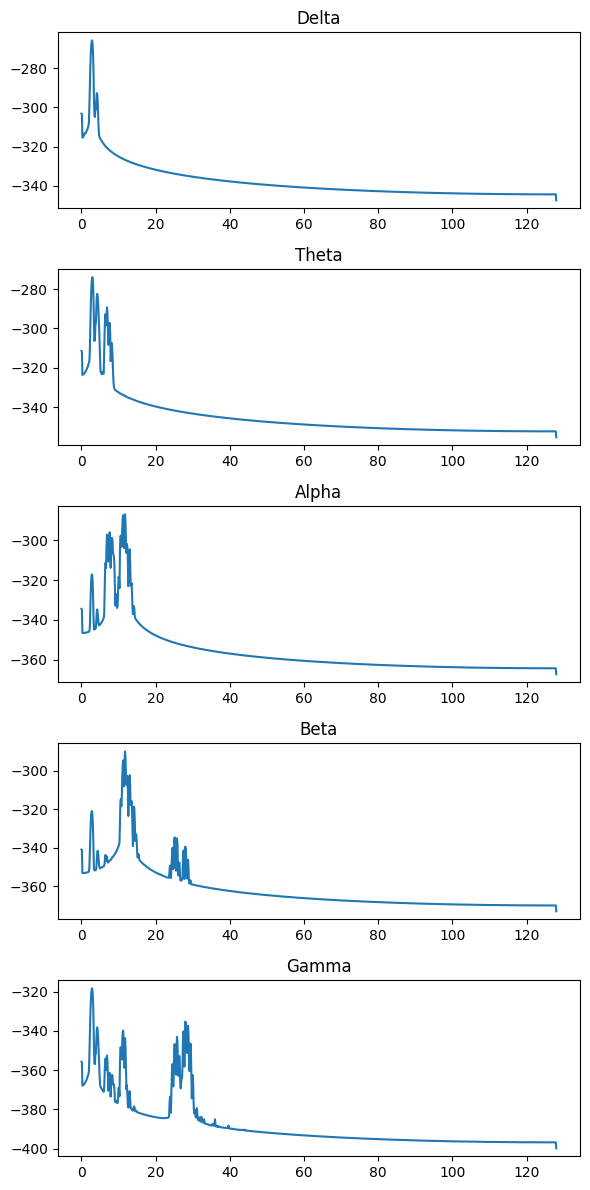

In [35]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(len(bands.keys()), figsize=(6,12))
for i, (band, data) in enumerate(bands.items()):
    # data.compute_psd().plot(axes=axs[i], show=False, db=True)
    psd = data.compute_psd()
    psd_data = psd.get_data()
    freqs = psd.freqs
    axs[i].plot(freqs, 10 * np.log10(psd_data.mean(axis=0)))
    
    axs[i].set_title(band)
plt.tight_layout()
plt.show()